**Author**:Karina Chiñas<br>
**Date**: July 07, 2020

<br>
<br>

#  Introduction to Machine Learning

## Breast Cancer Database

This notebook will be using the Breast Cancer Wisconsin (Diagnostic) Database, obtained from `sklearn.datasets`, to create a classifier that could help diagnose patients.

**C O N T E N T**

1. The features of the breast cancer dataset
2. Converting the dataset into a DataFrame
3. The class distribution
4. Train and tests sets
5. Using the knn classifier
6. Predicting the class labels for the test set X_test
7. Mean accuracy
8. Plotting accuracy

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

# if you would like to check dataset type use: type(cancer)
# if you would like to view list of attributes use: dir(cancer)

print(dataset.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
"""
    The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, 
    which is similar to a dictionary.
"""
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### 1. The features of the breast cancer dataset:

In [3]:
len(dataset['feature_names'])

30

### 2. Converting the dataset into a DataFrame:

- columns 

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
    
    <br>
    <br>

- index

    RangeIndex(start=0, stop=569, step=1)
    
    
**Hint**: `np.c_` is the numpy concatenate function.

In [4]:
cancerdf = pd.DataFrame(data=np.c_[dataset['data']],columns=dataset.feature_names)
cancerdf["target"] = dataset.target
cancerdf

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### 3. The class distribution:

Counting instances of `malignant` (as 0) and `benign` (as 1).

In [5]:
s = cancerdf.target.value_counts().rename({1:"benign",0:"malignant"})
s.sort_index(ascending=False)

malignant    212
benign       357
Name: target, dtype: int64

### 4. Train and tests sets:

Splitting the DataFrame into `X` and `y` (the data and the labels, respectively.)

*The tuple of length 2 represents:* `(X, y)`*, where* 
* `X`*, a DataFrame, with shape* `(569, 30)`
* `y`*, a Series, with shape* `(569,)`.

In [6]:
X = cancerdf.drop(cancerdf.columns[-1],axis=1) # cancer.feature_names are the features.
y = cancerdf[cancerdf.columns[-1]] # "target" is the only label.

X,y

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

Now, `train_test_split` is used to split `X` and `y` to create the test and train sets: 

    X_train
    X_test
    y_train 
    y_test

**Hint**: set the random number generator state to 0 using `random_state=0`so the results will replicate when running the code multiple times. 

*This returns the tuple:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *with shape* `(426, 30)`
* `X_test` *with shape* `(143, 30)`
* `y_train` *with shape* `(426,)`
* `y_test` *with shape* `(143,)`

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)    
X_train, X_test, y_train, y_test

# IMPORTANT: Sometimes it is important to shuffle the data before the split is done, specially if you work with 
# data that has been ordered by some parameter. Just set shuffle=True inside the train_test_split().

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 293       11.850         17.46           75.54      432.7          0.08372   
 332       11.220         19.86           71.94      387.3          0.10540   
 565       20.130         28.25          131.20     1261.0          0.09780   
 278       13.590         17.84           86.24      572.3          0.07948   
 489       16.690         20.20          107.10      857.6          0.07497   
 ..           ...           ...             ...        ...              ...   
 277       18.810         19.98          120.90     1102.0          0.08923   
 9         12.460         24.04           83.97      475.9          0.11860   
 359        9.436         18.32           59.82      278.6          0.10090   
 192        9.720         18.22           60.73      288.1          0.06950   
 559       11.510         23.93           74.52      403.5          0.09261   
 
      mean compactness  mean concavity  mean conca

### 5. Using the `knn` classifier:

The following fits a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Predicting the class label using the mean value for each feature.

**Hint**: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

In [9]:
means = cancerdf.mean()[:-1].values.reshape(1, -1)

prediction = knn.predict(means)
prediction

array([1])

    if output is array([1]):
    prediction = benign
    if output is array([0]):
    prediction = malignant

### 6. Predicting the class labels for the test set `X_test`:

In [10]:
knn.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

### 7. Mean accuracy:

The score is the mean accuracy of the `knn` classifier` using `X_test` and `y_test`

In [11]:
accuracy = knn.score(X_test, y_test)    
accuracy

0.916083916083916

### 8. Plotting accuracy:

The plotting function below is used to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

<IPython.core.display.Javascript object>


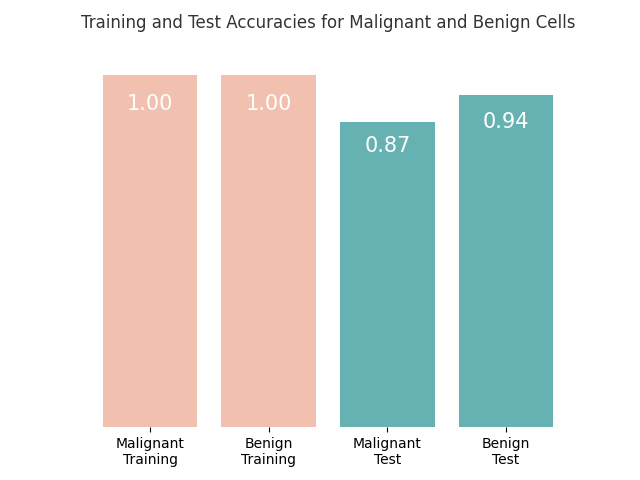

In [12]:
def accuracy_plot():
    """
    Returns a bar chart showing the train and test sets accuracies.
    """
    import matplotlib.pyplot as plt
    %matplotlib notebook

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plotting the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=["darksalmon","darksalmon","teal","teal"],  alpha=0.6)

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=15)

    # removing the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

        
    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest']);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells\n', alpha=0.8)
    
    # Turning off the y-axis only
    plt.gca().get_yaxis().set_visible(False)
    
    return plt.show()

accuracy_plot()

To know more about axes in `matplotlib`, visit [this page](https://www.delftstack.com/howto/matplotlib/how-to-turn-off-the-axes-for-subplots-in-matplotlib/).